In [2]:
import pandas as pd
import numpy as np

#reading the full data file 'comics.csv' ~ 73,66,386 rows 
df_comics = pd.read_csv("comics.csv")

In [3]:
#Applying filters to the above dataframe

#Taking only those books which the user has read
df_comics = df_comics[df_comics['isRead'] == True]

#dropping the unwanted columns
df_comics = df_comics.drop(['read_at', 'started_at', 'date_added', 'date_updated', 'isRead'], axis = 1)

#drop series books and books which have no overview

In [4]:
df_book = pd.read_csv("books.csv")

In [5]:
#prepare a dataframe by dropping series books and books whose overview is null
df_book_req = df_book[df_book.astype(str)['series'] == '[]'] 
df_book_req = df_book_req.dropna(subset=['description'])
req_books = df_book_req['book_id'].copy(deep=True)

In [6]:
#converting series to frame
req_books = req_books.to_frame()

In [7]:
req_books

,book_id
1,1333909
3,6066819
5,287141
8,34883016
9,287149
13,28575155
15,89375
16,89376
17,89377
18,89378


In [7]:
#perform a merge on df_comics and req_books
#resulting no of rows: ~731859 
comics_after_dropping = pd.merge(df_comics, req_books, on = 'book_id', how = 'inner')  

In [8]:
comics_after_dropping

,user_id,book_id,review_id,rating
0,d986f354a045ffb91234e4af4d1b12fd,28116811,5a23bc6b99a1dd7cb93ebf455f0846cc,0
1,1a4eeeddcf390be6d3820fde01986abf,28116811,536d59fced819766b4c4086e81fc455d,0
2,88e61b2c84d4190ed03b29804a845341,28116811,7fe0c7030146918cf632f09704dd5d0e,4
3,c69bdadc67a07c058f4e73c5838fb50e,28116811,264fbfd7c95204f08deb80a5c9064bfa,5
4,00e803cb366cc591a23bafd6763bf8bd,28116811,45cc315dc8277fae9b9f096cd1feafb0,3
5,977f74d6a8d94c69c896d67a4f8d710b,28116811,f83329c5bdbc7c5b639daa65af2ddb86,3
6,bfaa5f332db79d294c39d8f6a3de6c32,28116811,53c4740f67bc03ca2a23583324ed9a2e,5
7,57bc780fa5034e6c6e8ac64e732ef1f3,28116811,b47b6d9f3da9bedb78556e2a4dc42644,4
8,57bc780fa5034e6c6e8ac64e732ef1f3,28116811,15eaec23fb8a7908ec6bf699734c5ac7,4
9,f6652731f479d5fbfee0394c646f8989,28116811,e15c3be1385b5daf6bc414c8fd589ddb,2


In [9]:
# import sys
# np.set_printoptions(threshold=sys.maxsize)

# a = comics_after_dropping.book_id.unique()
# for i in range(len(a)):
#     print a[i]

In [10]:
#Number of books read per user id
Book_Count_3 = pd.DataFrame(comics_after_dropping.groupby(['user_id'])['book_id'].count())

#Average Rating per user id
Average_Rating_3 = pd.DataFrame(comics_after_dropping.groupby(['user_id'])['rating'].mean())

Comics_Aggregated = pd.merge(Book_Count_3, Average_Rating_3, left_index=True, right_index=True)
Comics_Aggregated.columns = ['#Comics Books Read', 'Comics Average Rating']

In [11]:
#Final dataframe ~152419 rows
Comics_Aggregated

,#Comics Books Read,Comics Average Rating
user_id,,
0000bad9195b66484e98f7f4be5f227a,1,4.000000
0001592d9ddd2588d815969f86132b49,1,5.000000
000192962b87d560f00b06fdcbd71681,4,4.250000
000253cf1077f203bca050637f2ec7f7,1,3.000000
000259bcbae87b5fd301a6f507ac3f49,1,0.000000
00034e7004b7de8f5da32c23b1330859,7,4.142857
0003a8eb2989503d03ad7ca701898a48,3,0.666667
0003f216823de684cea464170efe1d42,1,0.000000
0004a0bcdd96ce79bfccae1ff9459383,2,5.000000


In [12]:
#preparing the nlp dataframe
nlp_comics = pd.merge(comics_after_dropping, df_book_req, on = 'book_id', how = 'inner')  
#dropping the unwanted columns
nlp_comics = nlp_comics.drop(['review_id', 'asin', 'average_rating', 'ratings_count', 'series'], axis = 1)

In [13]:
nlp_comics.to_csv("NLP_Comics.csv")

In [14]:
#Finding the target book
#Finding the top 10 books read by most people

target_book_series = comics_after_dropping.groupby(['book_id'])['user_id'].count()
target_book_df = target_book_series.to_frame()
target_book_df.reset_index(level=0, inplace=True)
target_book_df.rename(columns = {'index':'book_id'}, inplace = True)
target_book_df.columns = ['Book ID', 'No Of Users']
target_book_df = target_book_df.sort_values(by = ['No Of Users'], ascending=False)
target_book_df = target_book_df.head(10)

In [15]:
target_book_df

,Book ID,No Of Users
1155,472331,31219
10559,17571564,12247
60,25179,8458
12220,19351043,7759
116,38990,6285
405,118944,5953
218,62953,5600
11762,18659623,5480
6311,9615347,5045
11585,18465566,4494


In [16]:
#Plotting the no of users who read the different books
#Only plotting the Top 10 most read books

import matplotlib.pyplot as plt

index = ['Watchmen', 'Hyperbole and a Half', 'Blankets', 'Nimona', 'Fun Home: A Family Tragicomic', 'American Born Chinese', 'Ghost World', 'Through the Woods', 'Anya\'s Ghost', 'This One Summer']
x = np.arange(10)
y = target_book_df['No Of Users'].astype(int).tolist()

print y
plt.bar(x, y)
plt.xticks(x, index, fontsize=9, rotation=90)
plt.xlabel("Book Id")
plt.ylabel("No of Books")
plt.title("TOP 10 -- Which book is read the most by the users on GoodReads?")
plt.show()

[31219, 12247, 8458, 7759, 6285, 5953, 5600, 5480, 5045, 4494]


<Figure size 640x480 with 1 Axes>

In [17]:
import sys
np.set_printoptions(threshold=sys.maxsize)

df=pd.read_csv("NLP_Comics.csv",index_col=False)
df=df.drop(columns="Unnamed: 0")
df=df.sort_values(by=["user_id"])
targetclassid=472331
df["user_id"].nunique()
dftarget = df[df["book_id"]==targetclassid]
listofusers=dftarget["user_id"].unique()
print listofusers[0]


0000bad9195b66484e98f7f4be5f227a


In [18]:
Comics_Aggregated.reset_index(level=0, inplace=True)

In [19]:
Comics_Aggregated

,user_id,#Comics Books Read,Comics Average Rating
0,0000bad9195b66484e98f7f4be5f227a,1,4.000000
1,0001592d9ddd2588d815969f86132b49,1,5.000000
2,000192962b87d560f00b06fdcbd71681,4,4.250000
3,000253cf1077f203bca050637f2ec7f7,1,3.000000
4,000259bcbae87b5fd301a6f507ac3f49,1,0.000000
5,00034e7004b7de8f5da32c23b1330859,7,4.142857
6,0003a8eb2989503d03ad7ca701898a48,3,0.666667
7,0003f216823de684cea464170efe1d42,1,0.000000
8,0004a0bcdd96ce79bfccae1ff9459383,2,5.000000
9,0005a08accd53b1e19c52109a1f478cb,2,3.500000


In [23]:
Comics_Aggregated['class'] = 1

# for i in range(0, 5):
for i in range(0,len(Comics_Aggregated)):
    if(Comics_Aggregated.iloc[i,0] in listofusers):
        Comics_Aggregated.iloc[i, -1] = 1
    else:
        Comics_Aggregated.iloc[i,-1] = 0

In [24]:
Comics_Aggregated.to_csv("Comics_Aggregated.csv")

In [25]:
final_df = pd.read_csv("Comics_Aggregated.csv")

In [ ]:
lst = ['0000bad9195b66484e98f7f4be5f227a']  

if '0000bad9195b66484e98f7f4be5f227a' in lst:
    print "YAAY"

In [ ]:
print Comics_Aggregated['class'].unique()

In [22]:
print "123"

123


In [ ]:
Comics_Aggregated.columns

In [ ]:
Comics_Aggregated = Comics_Aggregated.drop(columns  = ['class'], axis = 1)

In [ ]:
Comics_Aggregated.columns

In [21]:
Comics_Aggregated

,user_id,#Comics Books Read,Comics Average Rating,class
0,0000bad9195b66484e98f7f4be5f227a,1,4.000000,1
1,0001592d9ddd2588d815969f86132b49,1,5.000000,0
2,000192962b87d560f00b06fdcbd71681,4,4.250000,0
3,000253cf1077f203bca050637f2ec7f7,1,3.000000,0
4,000259bcbae87b5fd301a6f507ac3f49,1,0.000000,1
5,00034e7004b7de8f5da32c23b1330859,7,4.142857,1
6,0003a8eb2989503d03ad7ca701898a48,3,0.666667,1
7,0003f216823de684cea464170efe1d42,1,0.000000,1
8,0004a0bcdd96ce79bfccae1ff9459383,2,5.000000,1
9,0005a08accd53b1e19c52109a1f478cb,2,3.500000,1


In [4]:
Comics_Aggregated = pd.read_csv("Comics_Aggregated.csv")

In [5]:
Comics_Aggregated = Comics_Aggregated.drop(['Unnamed: 0'], axis = 1)

In [6]:
Comics_Aggregated

,user_id,#Comics Books Read,Comics Average Rating,class
0,0000bad9195b66484e98f7f4be5f227a,1,4.000000,1
1,0001592d9ddd2588d815969f86132b49,1,5.000000,0
2,000192962b87d560f00b06fdcbd71681,4,4.250000,0
3,000253cf1077f203bca050637f2ec7f7,1,3.000000,0
4,000259bcbae87b5fd301a6f507ac3f49,1,0.000000,1
5,00034e7004b7de8f5da32c23b1330859,7,4.142857,0
6,0003a8eb2989503d03ad7ca701898a48,3,0.666667,0
7,0003f216823de684cea464170efe1d42,1,0.000000,0
8,0004a0bcdd96ce79bfccae1ff9459383,2,5.000000,1
9,0005a08accd53b1e19c52109a1f478cb,2,3.500000,0


In [7]:
df1 = Comics_Aggregated
df2 = pd.read_csv("avg_simandprop.csv")

In [8]:
final_df = pd.merge(df1, df2, how='left', on=['user_id'])
final_df = final_df[['user_id','#Comics Books Read','Comics Average Rating','avg_similarity', 'proportion', 'class']]

In [9]:
final_df = final_df.fillna(0)
final_df = final_df.drop(['user_id'], axis = 1)

In [10]:
final_df

,#Comics Books Read,Comics Average Rating,avg_similarity,proportion,class
0,1,4.000000,0.000000,0.000000,1
1,1,5.000000,1.031639,1.000000,0
2,4,4.250000,0.931630,0.000000,0
3,1,3.000000,1.051219,1.000000,0
4,1,0.000000,0.000000,0.000000,1
5,7,4.142857,0.977892,0.285714,0
6,3,0.666667,0.680499,0.666667,0
7,1,0.000000,0.968734,0.000000,0
8,2,5.000000,1.010162,1.000000,1
9,2,3.500000,1.021222,1.000000,0


AUC for Model: Random Forest is:  0.9499483337638853


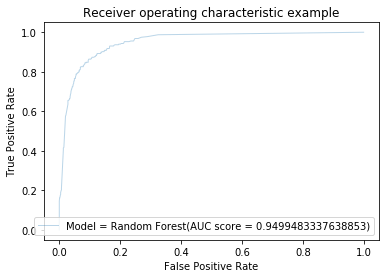

Accuracy: 0.9099099099099099%
Precision: 0.7980769230769231%
Recall: 0.7879746835443038%
F1 score:0.7929936305732483%
Confusion matrix, without normalization
[[1064   63]
 [  67  249]]


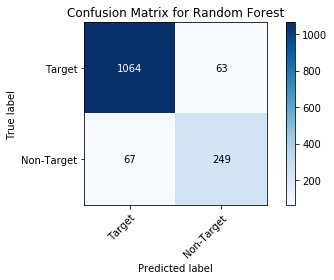

AUC for Model: Logistic Regression is:  0.7619323733896421


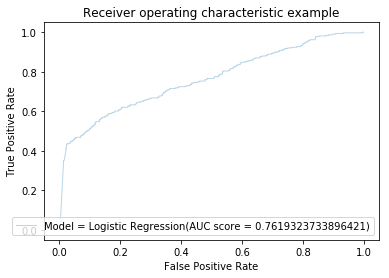

Accuracy: 0.8558558558558559%
Precision: 0.8214285714285714%
Recall: 0.43670886075949367%
F1 score:0.5702479338842975%
Confusion matrix, without normalization
[[1097   30]
 [ 178  138]]


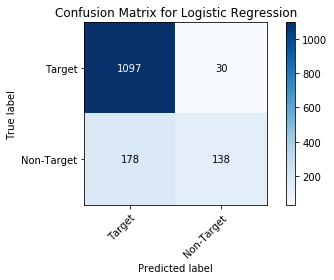

AUC for Model: Naive Bayes is:  0.7367001561218874


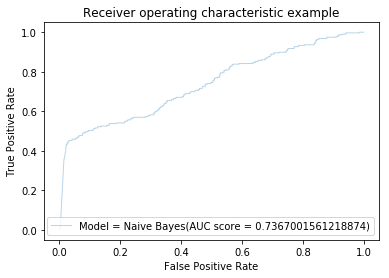

Accuracy: 0.8482328482328483%
Precision: 0.7512953367875648%
Recall: 0.4588607594936709%
F1 score:0.5697445972495089%
Confusion matrix, without normalization
[[1079   48]
 [ 171  145]]


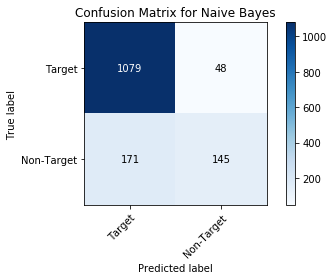

AUC for Model: KNN is:  0.9463373131310862


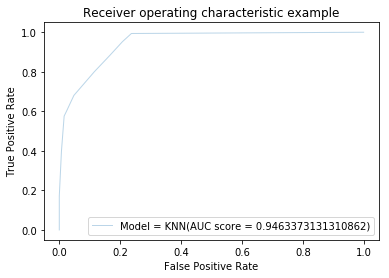

Accuracy: 0.8925848925848926%
Precision: 0.7992565055762082%
Recall: 0.680379746835443%
F1 score:0.735042735042735%
Confusion matrix, without normalization
[[1073   54]
 [ 101  215]]


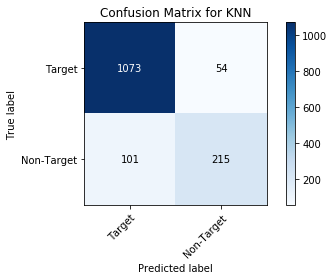

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes, title, normalize=False, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax


def perform_AUC(Y, preds, model_name):
    # Compute ROC curve and area the curve
    fpr, tpr, _ = roc_curve(Y, preds)
    roc_auc = auc(fpr, tpr)
    print "AUC for Model: " + model_name + " is: ", roc_auc   
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='Model = ' + model_name + "(AUC score = " + str(roc_auc) + ")")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def metrics(testy, predy):
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, predy)
    print 'Accuracy: ' + str(accuracy) + "%"
    # precision tp / (tp + fp)
    precision = precision_score(testy, predy)
    print 'Precision: ' + str(precision) + "%"
    # recall: tp / (tp + fn)
    recall = recall_score(testy, predy)
    print 'Recall: ' + str(recall) + "%"
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, predy)
    print'F1 score:' + str(f1) + "%"

def k_fold_splits(df, k):
    n,m = df.shape #number of rows, columns
    X = df.iloc[:, :m-1] #training feature data
    y = df.iloc[:, -1] #training label data
    
    kf = KFold(n_splits = k, shuffle = True, random_state = 123)

    indexes_train_list = [] 
    indexes_test_list = []

    for train_index, test_index in kf.split(X):
        indexes_train_list.append(train_index)
        indexes_test_list.append(test_index)

    return indexes_train_list, indexes_test_list
    
def do_cv_class(df, num_folds, indexes_train_list, indexes_test_list):
    n,m = df.shape #number of rows, columns
    X = df.iloc[:, :m-1] #training feature data
    y = df.iloc[:, -1] #training label data

    for i in range(len(indexes_train_list)):
        train_index = indexes_train_list[i]
        test_index = indexes_test_list[i]

        X_train = X.iloc[train_index[0:train_index.shape[0]]]
        X_test = X.iloc[test_index[0:test_index.shape[0]]]
        Y_train = y.iloc[train_index[0:train_index.shape[0]]]
        Y_test = y.iloc[test_index[0:test_index.shape[0]]]

        train = pd.concat([X_train, Y_train], axis=1, join_axes=[X_train.index])
        test = pd.concat([X_test, Y_test], axis=1, join_axes=[X_test.index])

    return train, test


#Random Forest
def get_pred_random_forest(train,test):
    # Your implementation goes here
    n,m = train.shape
    X = train.iloc[:, :m-1] #get training input data not including the labels
    y = train.iloc[:, -1] #get the label column from training set
    query = test.iloc[:, :m-1] #get the test input data not including the labels
    true_y = test.iloc[:, -1]
    model = RandomForestClassifier(n_estimators=300) 
    model.fit(X,y)
    # make predictions for test data
    pred_y = model.predict(query)
    pred_prob_y = model.predict_proba(query)
    pred_prob_y = pred_prob_y[:, 1].tolist()
    return pred_prob_y, true_y.values.tolist(), pred_y

#XGBoost
def get_pred_xgboost(train,test):
    # Your implementation goes here
    n,m = train.shape
    X = train.iloc[:, :m-1] #get training input data not including the labels
    y = train.iloc[:, -1] #get the label column from training set
    query = test.iloc[:, :m-1] #get the test input data not including the labels
    true_y = test.iloc[:, -1]
    # fit model no training data
    model = XGBClassifier()
    model.fit(X, y)
    # make predictions for test data
    pred_y = model.predict(query)
    pred_prob_y = model.predict_proba(query)
    pred_prob_y = pred_prob_y[:, 1].tolist()
    return pred_prob_y, true_y.values.tolist(), pred_y
  
# Logistic Regression
# Assumes the last column of data is the output dimension
def get_pred_logreg(train,test):
    # Your implementation goes here
    # You may leverage the linear_model module from sklearn (scikit-learn)
    n,m = train.shape
    X = train.iloc[:, :m-1] #get training input data not including the labels
    y = train.iloc[:, -1] #get the label column from training set
    query = test.iloc[:, :m-1] #get the test input data not including the labels
    true_y = test.iloc[:, -1]
    model = LogisticRegression().fit(X, y)
    pred_y = model.predict(query)  
    pred_prob_y = model.predict_proba(query)
    pred_prob_y = pred_prob_y[:, 1].tolist()
    return pred_prob_y, true_y.values.tolist(), pred_y

# Naive Bayes
# Assumes the last column of data is the output dimension
def get_pred_nb(train,test):
    # Your implementation goes here
    # You may leverage the naive_bayes module from sklearn (scikit-learn)
    n,m = train.shape
    X = train.iloc[:, :m-1] #get training input data not including the labels
    y = train.iloc[:, -1] #get the label column from training set
    query = test.iloc[:, :m-1] #get the test input data not including the labels
    true_y = test.iloc[:, -1]  
    model = GaussianNB().fit(X, y)
    pred_y = model.predict(query)
    pred_prob_y = model.predict_proba(query)
    pred_prob_y = pred_prob_y[:, 1].tolist()
    return pred_prob_y, true_y.values.tolist(), pred_y

# k-Nearest Neighbor
# Assumes the last column of data is the output dimension
# Hint: you might want to use predit_proba to get predicted probabilities
def get_pred_knn(train,test,k):
    # Your implementation goes here
    # You may leverage the neighbors module from sklearn (scikit-learn)
    n,m = train.shape
    X = train.iloc[:, :m-1] #get training input data not including the labels
    y = train.iloc[:, -1] #get the label column from training set
    query = test.iloc[:, :m-1] #get the test input data not including the labels
    true_y = test.iloc[:, -1]     
    model = KNeighborsClassifier(n_neighbors = k).fit(X, y)
    pred_y = model.predict(query)
    pred_prob_y = model.predict_proba(query)
    pred_prob_y = pred_prob_y[:, 1].tolist()
    return pred_prob_y, true_y.values.tolist(), pred_y
    
df = final_df
#Using k-fols validation
num_folds = 100
indexes_train_list, indexes_test_list = k_fold_splits(df, num_folds)
class_names = ['Target', 'Non-Target']

#Modelling....

#running random_forest regression model
train, test = do_cv_class(df, num_folds, indexes_train_list, indexes_test_list)
preds, Y, pred_labels = get_pred_random_forest(train, test)

#Accuracy -- ROC curve
perform_AUC(Y, preds, "Random Forest")
metrics(Y, pred_labels)

title = 'Confusion Matrix for Random Forest'
plot_confusion_matrix(Y, pred_labels, class_names, title, normalize=False)

#running xgboost regression model
# train, test = do_cv_class(df, num_folds, indexes_train_list, indexes_test_list)
# preds, Y = get_pred_xgboost(train, test)
# #Accuracy -- ROC curve
# perform_AUC(Y, preds, "XGBoost")

#running logistic regression model
train, test = do_cv_class(df, num_folds, indexes_train_list, indexes_test_list)
preds, Y, pred_labels = get_pred_logreg(train, test)
#Accuracy -- ROC curve
perform_AUC(Y, preds, "Logistic Regression")
metrics(Y, pred_labels)

title = 'Confusion Matrix for Logistic Regression'
plot_confusion_matrix(Y, pred_labels, class_names, title, normalize=False)

train, test = do_cv_class(df, num_folds, indexes_train_list, indexes_test_list)
#running Naive Bayes model
preds, Y, pred_labels = get_pred_nb(train, test)
perform_AUC(Y, preds, "Naive Bayes")
metrics(Y, pred_labels)

title = 'Confusion Matrix for Naive Bayes'
plot_confusion_matrix(Y, pred_labels, class_names, title, normalize=False)

train, test = do_cv_class(df, num_folds, indexes_train_list, indexes_test_list)
#running KNN regression model
preds, Y, pred_labels = get_pred_knn(train, test, 10)
perform_AUC(Y, preds, "KNN")
metrics(Y, pred_labels)

title = 'Confusion Matrix for KNN'
plot_confusion_matrix(Y, pred_labels, class_names, title, normalize=False)

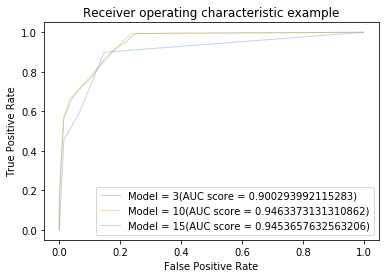

In [23]:
#Hyperparameter

def get_pred_knn(train,test,k):
    # Your implementation goes here
    # You may leverage the neighbors module from sklearn (scikit-learn)
    n,m = train.shape
    X = train.iloc[:, :m-1] #get training input data not including the labels
    y = train.iloc[:, -1] #get the label column from training set
    query = test.iloc[:, :m-1] #get the test input data not including the labels
    true_y = test.iloc[:, -1]     
    model = KNeighborsClassifier(n_neighbors = k).fit(X, y)
    pred_y = model.predict(query)
    pred_prob_y = model.predict_proba(query)
    pred_prob_y = pred_prob_y[:, 1].tolist()   
    return pred_prob_y, true_y.values.tolist(), pred_y

all_K = [3, 10, 15]
#running KNN regression model
for i in range(len(all_K)):
    preds, Y, pred_labels = get_pred_knn(train, test, all_K[i])
    fpr, tpr, _ = roc_curve(Y, preds)
    roc_auc = auc(fpr, tpr)
    #print "AUC for k= " + tag + " is: ", roc_auc   
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='Model = ' + str(all_K[i]) + "(AUC score = " + str(roc_auc) + ")")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
plt.show()

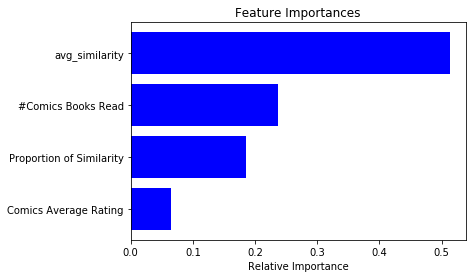

In [26]:
#Random Forest
def get_pred_random_forest(train,test):
    # Your implementation goes here
    n,m = train.shape
    X = train.iloc[:, :m-1] #get training input data not including the labels
    y = train.iloc[:, -1] #get the label column from training set
    query = test.iloc[:, :m-1] #get the test input data not including the labels
    true_y = test.iloc[:, -1]
    model = RandomForestClassifier(n_estimators=300) 
    model.fit(X,y)
    # make predictions for test data
    pred_y = model.predict(query)
    pred_prob_y = model.predict_proba(query)
    pred_prob_y = pred_prob_y[:, 1].tolist()
    #return pred_prob_y, true_y.values.tolist(), pred_y

    #features = df.columns
    df.columns = ['#Comics Books Read', 'Comics Average Rating', 'avg_similarity', 'Proportion of Similarity', 'Target class']
    features = df.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
get_pred_random_forest(train, test)